In [1]:
import pandas as pd
pd.read_csv('dns_logs1.csv')

,Timestamp,Client IP,Domain,Mode,Server_IP,Step,Response type,RTT(s),Cache Status,Cumulative Time(ms),Cumulative Bytes
0,2025-10-26 14:04:32,10.0.0.1,tuhafhaberler.com.,Recursive,198.41.0.4,Root,Referral,166.6443,MISS,166.6443,530
1,2025-10-26 14:04:32,10.0.0.1,tuhafhaberler.com.,Recursive,192.41.162.30,TLD,Referral,152.3237,MISS,318.9680,673
2,2025-10-26 14:04:32,10.0.0.1,tuhafhaberler.com.,Recursive,-,NaN,Failure,NaN,MISS,318.9680,673
3,2025-10-26 14:04:32,10.0.0.1,rtsab.com.,Recursive,-,Cache,Referral,NaN,HIT,0.0000,0
4,2025-10-26 14:04:32,10.0.0.1,rtsab.com.,Recursive,192.35.51.30,Authoritative,Referral,176.6738,MISS,176.6738,202
...,...,...,...,...,...,...,...,...,...,...,...
2547,2025-10-26 14:19:50,10.0.0.4,xxx-muschis.de.,Recursive,194.146.107.6,Authoritative,Referral,187.6593,MISS,187.6593,127
2548,2025-10-26 14:19:50,10.0.0.4,xxx-muschis.de.,Recursive,-,NaN,Failure,NaN,MISS,187.6593,127
2549,2025-10-26 14:19:50,10.0.0.4,florenseusa.com.,Recursive,-,Cache,Referral,NaN,HIT,0.0000,0
2550,2025-10-26 14:19:50,10.0.0.4,florenseusa.com.,Recursive,192.35.51.30,Authoritative,Referral,176.7666,MISS,176.7666,206


In [10]:
import dpkt
def read_pcap(filename):
    with open(filename, "rb") as f:
            pcap = dpkt.pcap.Reader(f)
            dns_packets = []

            for ts, buf in pcap:
                try:
                    eth = dpkt.ethernet.Ethernet(buf)
                    if not isinstance(eth.data, dpkt.ip.IP):
                        continue

                    ip = eth.data
                    if not isinstance(ip.data, dpkt.udp.UDP):
                        continue

                    udp = ip.data
                    # Check if UDP is DNS traffic
                    if udp.sport == 53 or udp.dport == 53:
                        dns_pkt = dpkt.dns.DNS(udp.data)
                        if dns_pkt.qr == dpkt.dns.DNS_Q and dns_pkt.qd:
                            dns_packets.append(dns_pkt)
                except Exception:
                    continue

    print(f"Found {len(dns_packets)} DNS queries in pcap")
    return dns_packets

## All Queries have rd =1 

In [13]:
for i in range(1,5):
    dns_queries = read_pcap(f"PCAP_{i}_H{i}.pcap")
    for dns_query in dns_queries:
        if not dns_query.rd: 
            print(dns_query.rd)
            print(dns_query.qd[0].name)

Found 100 DNS queries in pcap
Found 100 DNS queries in pcap
Found 100 DNS queries in pcap
Found 100 DNS queries in pcap


In [24]:
df = pd.read_csv('dns_logs1.csv')
prev = df.iloc[0]["Domain"]
print(domain_names[0])

tuhafhaberler.com.


In [52]:
print(domain_names)

['tuhafhaberler.com.', 'rtsab.com.', 'i-butterfly.ru.', 'datepanchang.com.', 'localhost.re.', 'daehepharma.com.', 'ex-jw.org.', 'us.tf.', 'informarexresistere.fr.', 'running-sigi.de.', 'buynowfromusa.com.', 'pbprofile.com.', 'fini.net.', 'globalpoliticalspectrum.com.', '41latitude.com.', 'zzxu.cn.', 'energybulbs.co.uk.', 'o-ov.com.', 'lozo.com.', 'tottenhamhk.com.', 'newstetic.com.', 'triggerfish.se.', 'reprosystems.ru.', 'interfloracentral.co.uk.', 'afairjudgement.com.', 'owlcreek.com.', 'radioterminal.ru.', 'junio.com.', 'ditrblog.com.', 'alchemedialtd.com.', 'portclydegeneralstore.com.', 'alenpuaca.com.', 'dj-producer-j-mbargo.com.', 'iag-inc.com.', 'advertos.ru.', 'kh.ua.', 'kennethehartman.com.', 'hemcolubricants.com.', 'forpsi.net.', 'memeblender.com.', 'somode.com.', 'gamemob.com.', 'monsterhomesecuritystore.com.', 'door2games.com.', 'ondemandappliancerepair.com.', 'gensee.com.', 'caricsports.com.', 'auqzzx.com.', 'toaskfuture.com.', 'cetsi.fr.', 'probigbets.com.', 'bikesandtran

In [29]:
len(domain_names)

100

In [16]:
import pandas as pd
df = pd.read_csv('dns_logs1.csv')
df = df[df['Client IP']=="10.0.0.1"].copy()
df = df[df['Cache Status']=='MISS'].reset_index(drop=True)
prev = df.iloc[0]["Domain"]
freq_d = {}
time_q = {}
print(prev)
count = 0
for i,row in df.iterrows():
    if row['Domain'] in domain_names and row['Domain'] != prev:
            print(i-1,prev, count)
            freq_d[prev] = count
            time_q[prev] = df['Cumulative Time (ms)'].iloc[i-1]
            count = 1
            prev = row['Domain']
    elif row['Response type']!='Failure':
        count+=1
freq_d[prev] = count
time_q[prev] = df['Cumulative Time (ms)'].iloc[i]
print(len(freq_d))
print(len(time_q))

tuhafhaberler.com.
2 tuhafhaberler.com. 2
5 rtsab.com. 2
12 i-butterfly.ru. 7
14 datepanchang.com. 2
20 localhost.re. 6
23 daehepharma.com. 2
31 ex-jw.org. 8
59 us.tf. 27
67 informarexresistere.fr. 8
69 running-sigi.de. 1
71 buynowfromusa.com. 2
73 pbprofile.com. 1
76 fini.net. 3
78 globalpoliticalspectrum.com. 1
81 41latitude.com. 2
100 zzxu.cn. 18
109 energybulbs.co.uk. 9
127 o-ov.com. 17
129 lozo.com. 2
131 tottenhamhk.com. 1
133 newstetic.com. 2
136 triggerfish.se. 3
141 reprosystems.ru. 5
149 interfloracentral.co.uk. 8
151 afairjudgement.com. 2
153 owlcreek.com. 2
155 radioterminal.ru. 2
157 junio.com. 2
159 ditrblog.com. 1
161 alchemedialtd.com. 2
164 portclydegeneralstore.com. 3
166 alenpuaca.com. 2
168 dj-producer-j-mbargo.com. 1
177 iag-inc.com. 9
199 advertos.ru. 22
202 kh.ua. 3
204 kennethehartman.com. 2
210 hemcolubricants.com. 6
212 forpsi.net. 2
214 memeblender.com. 2
216 somode.com. 1
218 gamemob.com. 2
220 monsterhomesecuritystore.com. 1
222 door2games.com. 2
224 ondema

In [69]:
print(time_q)

{'tuhafhaberler.com.': np.float64(376.2893), 'rtsab.com.': np.float64(404.2327), 'i-butterfly.ru.': np.float64(375.1473), 'datepanchang.com.': np.float64(480.0235), 'localhost.re.': np.float64(642.2256), 'daehepharma.com.': np.float64(768.236), 'ex-jw.org.': np.float64(1592.1396), 'us.tf.': np.float64(168.7943), 'informarexresistere.fr.': np.float64(3571.0662), 'running-sigi.de.': np.float64(5935.9412), 'buynowfromusa.com.': np.float64(7728.403), 'pbprofile.com.': np.float64(10003.0293), 'fini.net.': np.float64(510.0458), 'globalpoliticalspectrum.com.': np.float64(1050.3641), '41latitude.com.': np.float64(1583.9224), 'zzxu.cn.': np.float64(62.8157), 'energybulbs.co.uk.': np.float64(590.7503), 'o-ov.com.': np.float64(502.2701), 'lozo.com.': np.float64(172.5999), 'tottenhamhk.com.': np.float64(658.501), 'newstetic.com.': np.float64(1200.4887), 'triggerfish.se.': np.float64(197.7805), 'reprosystems.ru.': np.float64(1259.9544), 'interfloracentral.co.uk.': np.float64(3113.7621), 'afairjudge

In [61]:
print(freq_d)

{'tuhafhaberler.com.': 2, 'rtsab.com.': 2, 'i-butterfly.ru.': 7, 'datepanchang.com.': 2, 'localhost.re.': 6, 'daehepharma.com.': 2, 'ex-jw.org.': 8, 'us.tf.': 27, 'informarexresistere.fr.': 8, 'running-sigi.de.': 1, 'buynowfromusa.com.': 2, 'pbprofile.com.': 1, 'fini.net.': 3, 'globalpoliticalspectrum.com.': 1, '41latitude.com.': 2, 'zzxu.cn.': 18, 'energybulbs.co.uk.': 9, 'o-ov.com.': 17, 'lozo.com.': 2, 'tottenhamhk.com.': 1, 'newstetic.com.': 2, 'triggerfish.se.': 3, 'reprosystems.ru.': 5, 'interfloracentral.co.uk.': 8, 'afairjudgement.com.': 2, 'owlcreek.com.': 2, 'radioterminal.ru.': 2, 'junio.com.': 2, 'ditrblog.com.': 1, 'alchemedialtd.com.': 2, 'portclydegeneralstore.com.': 3, 'alenpuaca.com.': 2, 'dj-producer-j-mbargo.com.': 1, 'iag-inc.com.': 9, 'advertos.ru.': 22, 'kh.ua.': 3, 'kennethehartman.com.': 2, 'hemcolubricants.com.': 6, 'forpsi.net.': 2, 'memeblender.com.': 2, 'somode.com.': 1, 'gamemob.com.': 2, 'monsterhomesecuritystore.com.': 1, 'door2games.com.': 2, 'ondemandap

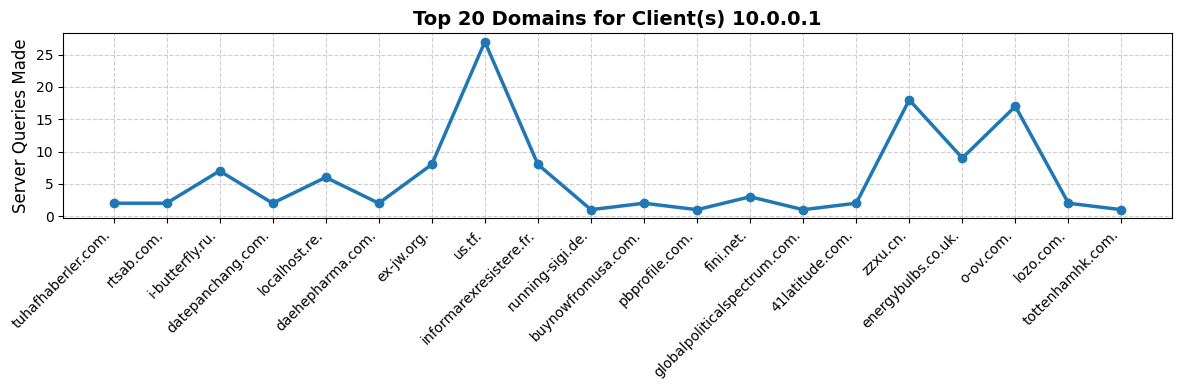

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
res_df = pd.DataFrame(list(freq_d.items()), columns=['Domain', 'Servers_used'])[:20]

domains = res_df['Domain'].tolist()[:20]
servers_used = res_df['Servers_used'].tolist()[:20]

plt.figure(figsize=(max(6, len(domains)*0.6), 4))
plt.plot(res_df['Domain'], servers_used, marker='o', linewidth=2.5, color='#1f77b4')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Server Queries Made", fontsize=12)

plt.title(f"Top {len(domains)} Domains for Client(s) 10.0.0.1", fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

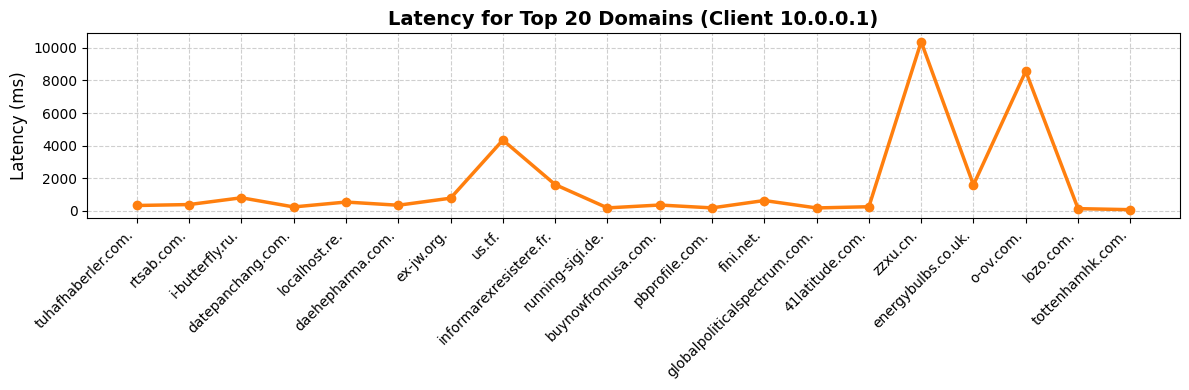

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
res_df = pd.DataFrame(list(time_q.items()), columns=['Domain', 'Latency (ms)'])[:20]

domains = res_df['Domain'].tolist()[:20]
latencies = res_df['Latency (ms)'].tolist()[:20]

plt.figure(figsize=(max(6, len(domains)*0.6), 4))
plt.plot(domains, latencies, marker='o', linewidth=2.5, color='#ff7f0e')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Latency (ms)", fontsize=12)
plt.title(f"Latency for Top {len(domains)} Domains (Client 10.0.0.1)", fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [13]:
dt = [{'avg_lookup_latency_sec': 0.13912769680023193,
 'avg_throughput_bytes_per_sec': 1414.8319527394592,
 'hostname': 'h1',
 'num_failed_resolutions': 24,
 'num_successful_queries': 76},

{'avg_lookup_latency_sec': 0.14773,
 'avg_throughput_bytes_per_sec': 1057.654188499683,
 'hostname': 'h2',
 'num_failed_resolutions': 28,
 'num_successful_queries': 72},

{'avg_lookup_latency_sec': 0.19203,
 'avg_throughput_bytes_per_sec': 732.2054953249767,
 'hostname': 'h3',
 'num_failed_resolutions': 29,
 'num_successful_queries': 71},
{'avg_lookup_latency_sec': 0.19235711402893066,
 'avg_throughput_bytes_per_sec': 639.344225341355,
 'hostname': 'h4',
 'num_failed_resolutions': 24,
 'num_successful_queries': 76}]

In [17]:
import pandas as pd
df = pd.DataFrame(dt)
df[['avg_lookup_latency_sec', 'avg_throughput_bytes_per_sec']] = df[['avg_lookup_latency_sec', 'avg_throughput_bytes_per_sec']].round(3)
df[['hostname']+list(df.columns[:2])+list(df.columns[3:])].to_latex("default_results.tex", index=False)